<a href="https://colab.research.google.com/github/SwaroopGaddam/ecommerce-marketing-mix-analysis/blob/main/mmm_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [88]:
!wget 'https://raw.githubusercontent.com/SwaroopGaddam/ecommerce-marketing-mix-analysis/refs/heads/main/data/3_year_marketing_data.csv' -O marketing_data.csv

--2025-04-06 19:38:46--  https://raw.githubusercontent.com/SwaroopGaddam/ecommerce-marketing-mix-analysis/refs/heads/main/data/3_year_marketing_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2383 (2.3K) [text/plain]
Saving to: ‘marketing_data.csv’

marketing_data.csv  100%[===================>]   2.33K  --.-KB/s    in 0s      

2025-04-06 19:38:46 (22.1 MB/s) - ‘marketing_data.csv’ saved [2383/2383]



In [63]:
column_info = [
    ["Month", "The month and year of the data record", "YYYY-MM (e.g., 2022-01)"],
    ["Sales", "Total revenue generated from all sales in that month", "INR (₹)"],
    ["TV_Spend", "Monthly spend on television advertising", "INR (₹)"],
    ["Digital_Spend", "Monthly spend on digital marketing (Google Ads, Meta Ads, etc.)", "INR (₹)"],
    ["Email_Spend", "Monthly spend on email marketing campaigns", "INR (₹)"],
    ["Influencer_Spend", "Monthly spend on influencer marketing (YouTube, Instagram, etc.)", "INR (₹)"],
    ["Price", "Average price per product sold during the month", "INR (₹)"],
    ["Promo_Discount", "Average discount percentage applied to products", "Percentage (%)"],
    ["Organic_Traffic", "Website visits from non-paid sources (SEO, direct, etc.)", "Count (visits)"],
    ["Paid_Traffic", "Website visits from paid advertising (SEM, display ads)", "Count (visits)"],
    ["Holiday_Season", "Flag for holiday promo month (Oct/Dec/Jan)", "Binary (1 = Yes, 0 = No)"]
]

df_columns = pd.DataFrame(column_info, columns=["Column Name", "Description", "Unit / Format"])
df_columns

,Column Name,Description,Unit / Format
0,Month,The month and year of the data record,"YYYY-MM (e.g., 2022-01)"
1,Sales,Total revenue generated from all sales in that...,INR (₹)
2,TV_Spend,Monthly spend on television advertising,INR (₹)
3,Digital_Spend,Monthly spend on digital marketing (Google Ads...,INR (₹)
4,Email_Spend,Monthly spend on email marketing campaigns,INR (₹)
5,Influencer_Spend,Monthly spend on influencer marketing (YouTube...,INR (₹)
6,Price,Average price per product sold during the month,INR (₹)
7,Promo_Discount,Average discount percentage applied to products,Percentage (%)
8,Organic_Traffic,"Website visits from non-paid sources (SEO, dir...",Count (visits)
9,Paid_Traffic,"Website visits from paid advertising (SEM, dis...",Count (visits)


# Data processing

## Data loading

Loading marketing data from the provided CSV file into a pandas DataFrame.


In [89]:
try:
    data = pd.read_csv('marketing_data.csv')
    display(data.head())
except FileNotFoundError:
    print("Error: 'marketing_data.csv' not found.")
    data = None
except Exception as e:
    print(f"An error occurred: {e}")
    data = None

,Month,Sales,TV_Spend,Digital_Spend,Email_Spend,Influencer_Spend,Organic_Traffic,Paid_Traffic,Holiday_Season,Price,Promo_Discount
0,2022-01,164414,20609,18935,2443,0,93200,10060,1,46.04,6.55
1,2022-02,125912,21585,11566,2469,0,83128,6145,0,42.54,8.65
2,2022-03,136342,23943,13315,1500,0,83622,7074,0,45.45,7.03
3,2022-04,153413,26569,16850,2246,0,83874,8952,0,47.61,9.91
4,2022-05,145488,21297,18419,2026,0,82798,9786,0,41.79,6.47


## Data exploration

I would like to explore the data in the DataFrame `data` to understand its characteristics, including data types, summary statistics, missing values, and unique values, as well as create histograms for numerical columns.



In [65]:
# Examine the data shape
print("Data shape:", data.shape)

# Check data types
print("\nData types:\n", data.dtypes)

# Summarize the data
print("\nSummary statistics:\n", data.describe(include='all'))

# Identify missing values
print("\nMissing values:\n", data.isnull().sum())
# Identify missing values
print("\nPercentage of Missing values:\n", data.isnull().sum()/len(data))

# Explore unique values
for col in data.columns:
    print(f"\nUnique values for column '{col}':")
    if data[col].dtype == 'object':
        print(data[col].unique())
    else:
        print(f"Number of unique values: {data[col].nunique()}")

Data shape: (36, 11)

Data types:
 Month                object
Sales                 int64
TV_Spend              int64
Digital_Spend         int64
Email_Spend           int64
Influencer_Spend      int64
Organic_Traffic       int64
Paid_Traffic          int64
Holiday_Season        int64
Price               float64
Promo_Discount      float64
dtype: object

Summary statistics:
           Month          Sales      TV_Spend  Digital_Spend  Email_Spend  \
count        36      36.000000     36.000000      36.000000    36.000000   
unique       36            NaN           NaN            NaN          NaN   
top     2022-01            NaN           NaN            NaN          NaN   
freq          1            NaN           NaN            NaN          NaN   
mean        NaN  165381.222222  21762.638889   23658.666667  2003.611111   
std         NaN   23124.214448   3019.940237    5982.000850   265.485461   
min         NaN  125912.000000  16260.000000   11566.000000  1500.000000   
25%         N

## Feature Engineering

As I can see in the data we only have indivial spends, but it makes more sense if I can check the Total Spends and use it to get the Marketing ROI in the given dataset

* Let us create a couple of features to analyse further

In [66]:
# Summing up all the marketing costs to one bucket can help us in analysis
data['Total_Marketing_Spend'] = data[['TV_Spend','Digital_Spend','Email_Spend','Influencer_Spend']].sum(axis=1)

In [67]:
# Calculating the ROI through marketing
data['Total_Marketing_ROI'] = data['Sales']/data['Total_Marketing_Spend']

In [68]:
# Effective price after the promo discount
data['Effective_Price'] = data['Price']*(1-data['Promo_Discount']/100)

In [69]:
# Converting Month to datetime data type
data['Month']=pd.to_datetime(data['Month'])

In [70]:
data.columns

Index(['Month', 'Sales', 'TV_Spend', 'Digital_Spend', 'Email_Spend',
       'Influencer_Spend', 'Organic_Traffic', 'Paid_Traffic', 'Holiday_Season',
       'Price', 'Promo_Discount', 'Total_Marketing_Spend',
       'Total_Marketing_ROI', 'Effective_Price'],
      dtype='object')

We can see two extra columns 'Total_Marketing_Spend' and 'Total_Marketing_ROI' got created.

# Data analysis


Now analysing the correlations between likely impacting variables, visualize the relationships between marketing spend and sales, investigate holiday seasons impact on sales, and other findings.



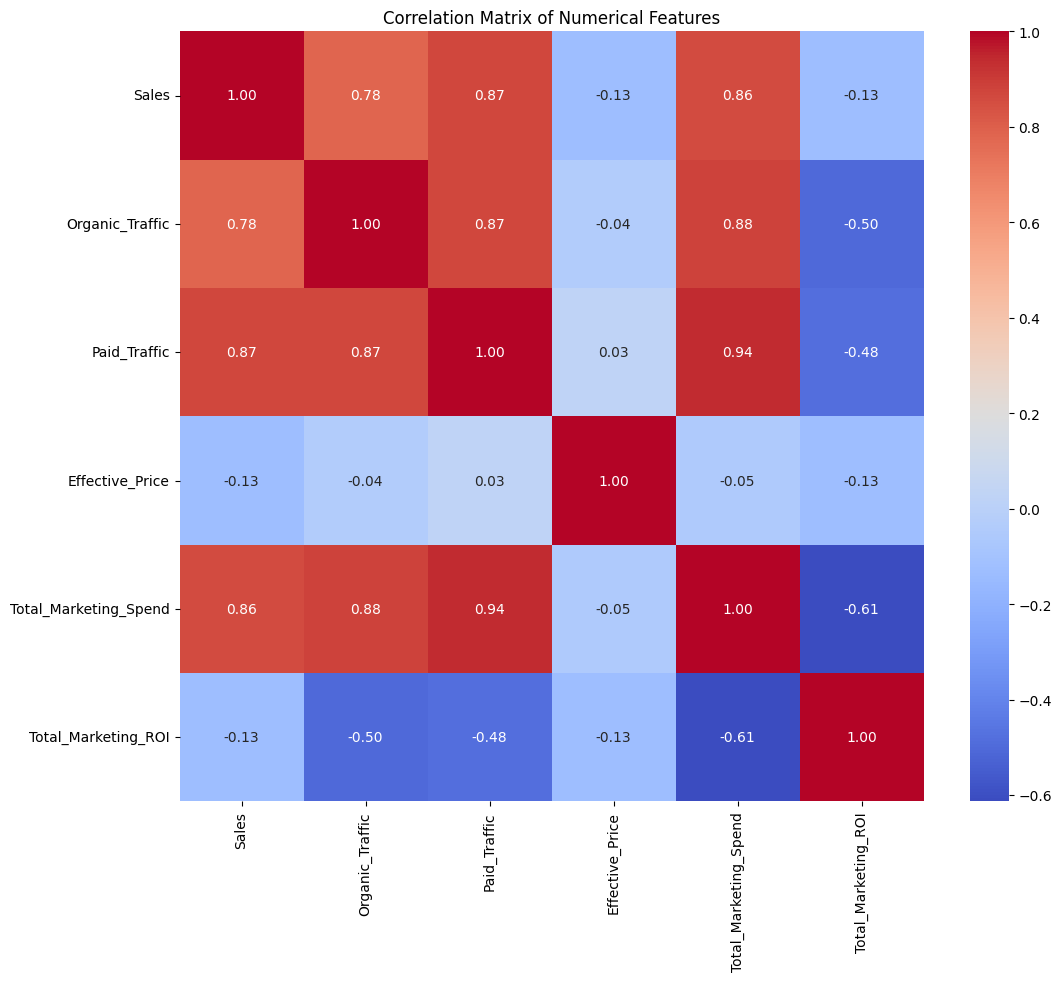

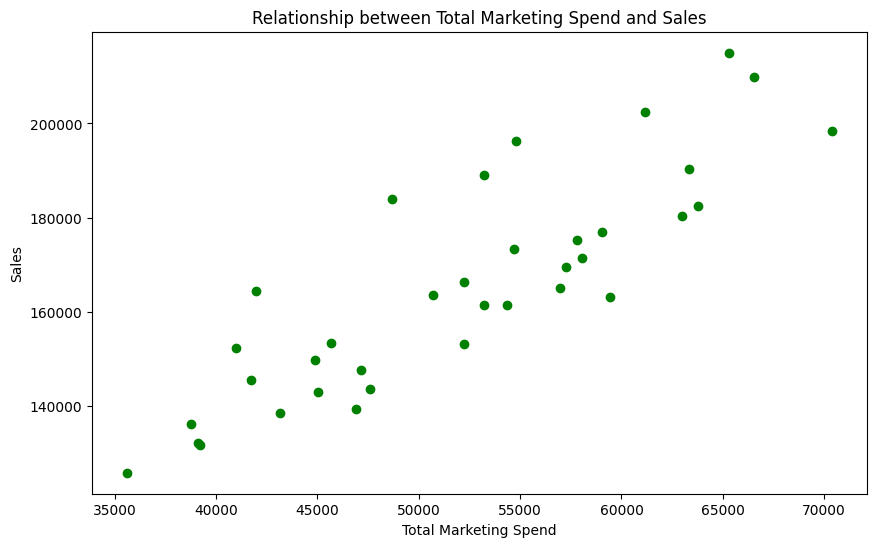

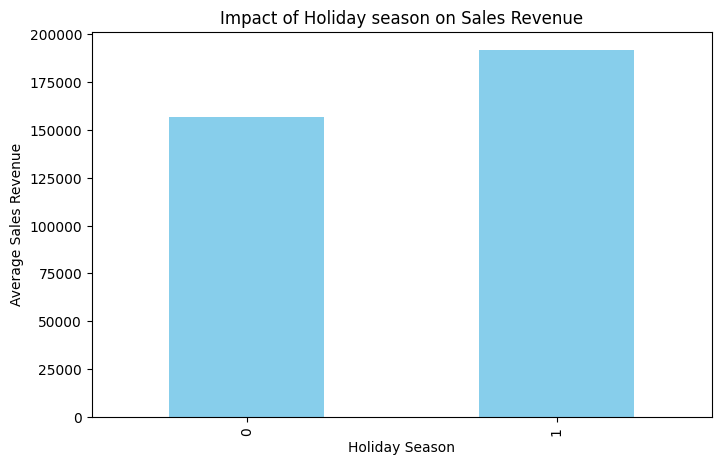

In [71]:
# 1. Correlation Matrix and Heatmap
numerical_features = data[['Sales','Organic_Traffic','Paid_Traffic','Effective_Price','Total_Marketing_Spend','Total_Marketing_ROI']]
correlation_matrix = numerical_features.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 2. Marketing Spend vs. Sales Revenue
plt.figure(figsize=(10, 6))
plt.scatter(data['Total_Marketing_Spend'], data['Sales'], color='green')
plt.xlabel('Total Marketing Spend')
plt.ylabel('Sales')
plt.title('Relationship between Total Marketing Spend and Sales')
plt.show()

# 3. Influencer Impact on Sales Revenue
seasonal_sales = data.groupby('Holiday_Season')['Sales'].mean()
plt.figure(figsize=(8, 5))
seasonal_sales.plot(kind='bar', color='skyblue')
plt.xlabel('Holiday Season')
plt.ylabel('Average Sales Revenue')
plt.title('Impact of Holiday season on Sales Revenue')
plt.show()

## Data visualization

Task is also to create visualizations to represent the insights found in data analysis.


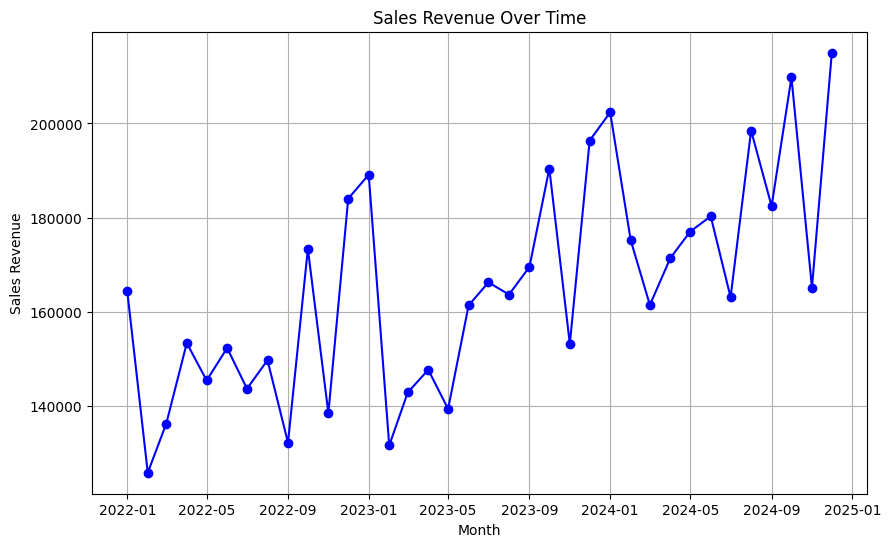

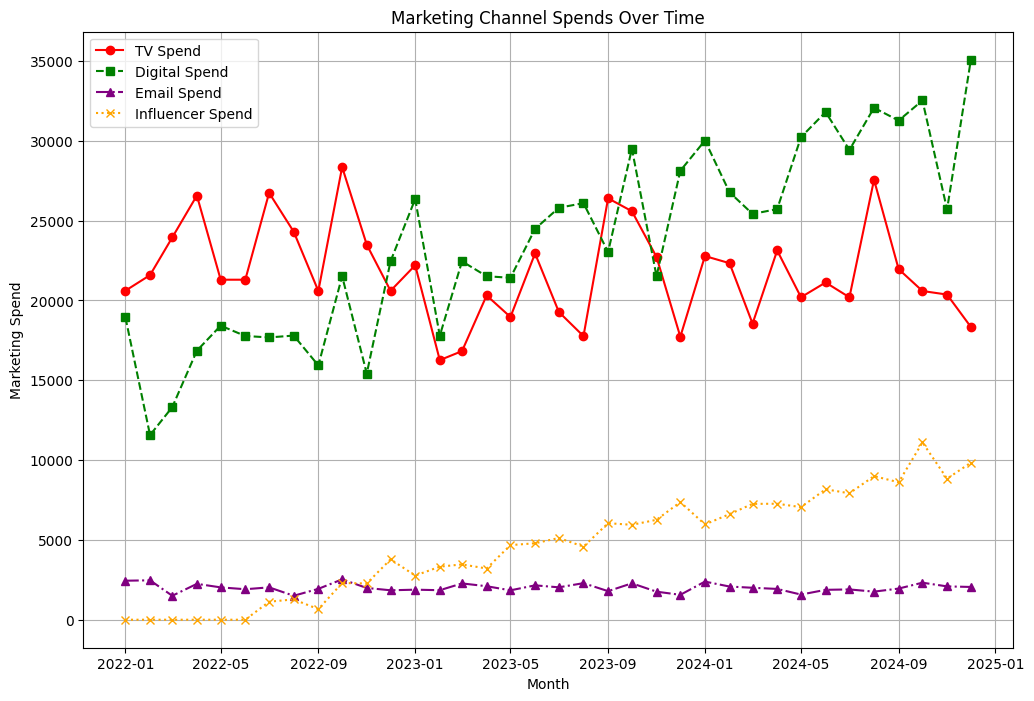

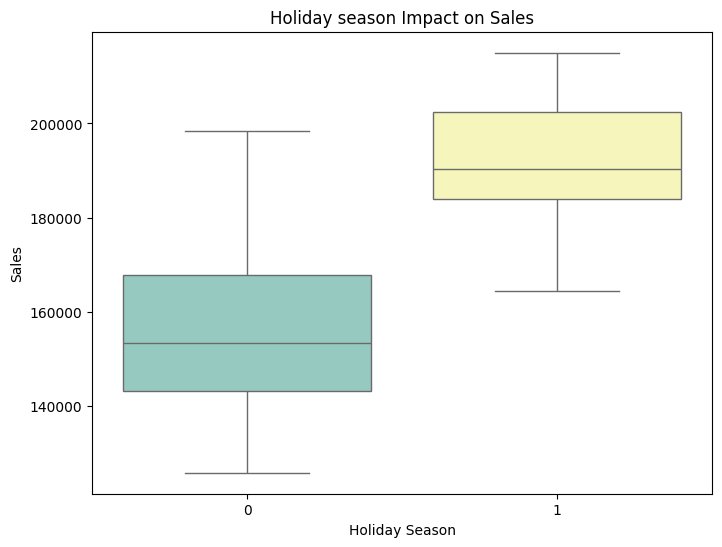

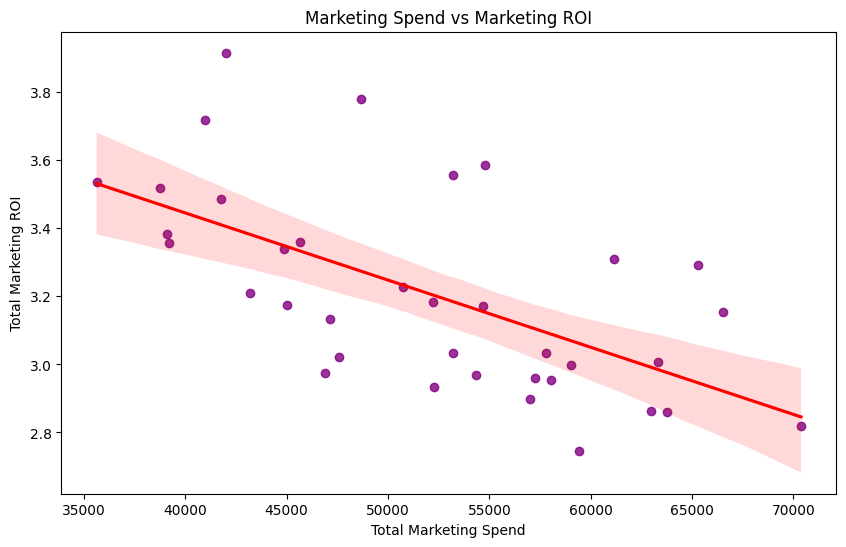

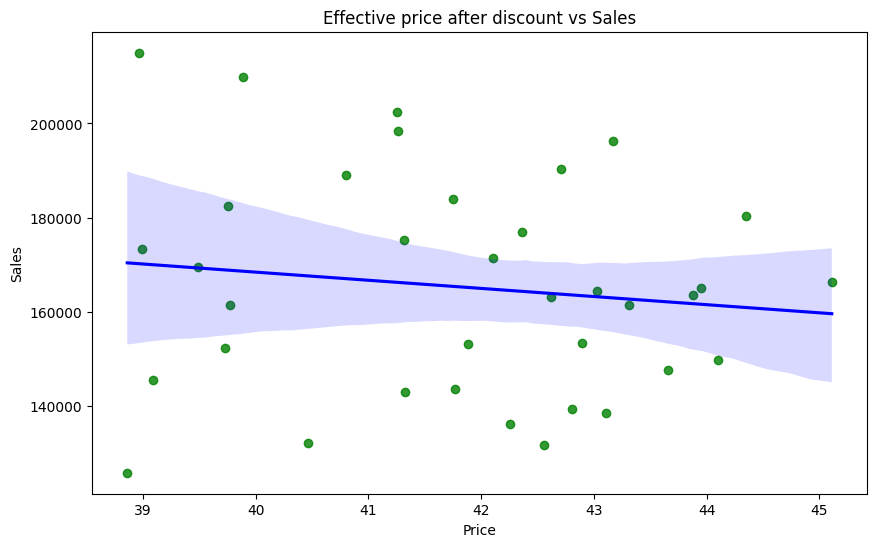

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Sales Revenue Over Time
plt.figure(figsize=(10, 6))
plt.plot(data['Month'], data['Sales'], marker='o', linestyle='-', color='blue')
plt.xlabel('Month')
plt.ylabel('Sales Revenue')
plt.title('Sales Revenue Over Time')
plt.grid(True)
plt.show()

# 2. Marketing Channel Performance
plt.figure(figsize=(12, 8))
plt.plot(data['Month'], data['TV_Spend'], label='TV Spend', marker='o', linestyle='-', color='red')
plt.plot(data['Month'], data['Digital_Spend'], label='Digital Spend', marker='s', linestyle='--', color='green')
plt.plot(data['Month'], data['Email_Spend'], label='Email Spend', marker='^', linestyle='-.', color='purple')
plt.plot(data['Month'], data['Influencer_Spend'], label='Influencer Spend', marker='x', linestyle=':', color='orange')
plt.xlabel('Month')
plt.ylabel('Marketing Spend')
plt.title('Marketing Channel Spends Over Time')
plt.legend()
plt.grid(True)
plt.show()

# 3. Seasonality Impact (Enhanced)
plt.figure(figsize=(8, 6))
sns.boxplot(x='Holiday_Season', y='Sales', data=data, palette='Set3')
plt.xlabel('Holiday Season')
plt.ylabel('Sales')
plt.title('Holiday season Impact on Sales')
plt.show()

# 4. Total Marketing ROI Analysis
plt.figure(figsize=(10, 6))
sns.regplot(x='Total_Marketing_Spend', y='Total_Marketing_ROI', data=data, scatter_kws={'color': 'purple'}, line_kws={'color': 'red'})
plt.xlabel('Total Marketing Spend')
plt.ylabel('Total Marketing ROI')
plt.title('Marketing Spend vs Marketing ROI')
plt.show()


# 5. Effective price after discount vs Sales
plt.figure(figsize=(10, 6))
sns.regplot(x='Effective_Price', y='Sales', data=data, scatter_kws={'color': 'green'}, line_kws={'color': 'blue'})
plt.xlabel('Price')
plt.ylabel('Sales')
plt.title('Effective price after discount vs Sales')
plt.show()

## Insights

### 1. Q&A

The above analysis implicitly explores questions like:

* What is the overall trend of sales over time?
* Analyse the trend of different marketing spends over the years.
* How does Total marketing spend impact sales over the years?
* What is the influence of holiday season on sales performance?
* What is the relationship between Total Marketing Spend and the ROI from Marketing?
* Is there a correlation between total marketing spend and sales revenue?


### 2. Data Analysis Key Findings

* **Negative Correlation between Marketing Spend and Marketing ROI:**  A moderately strong negative correlation (-0.62) was found between Total marketing Spend and Total marketing ROI. This suggests that as marketing spend increases, the Return on Investment tends to decrease.
* **Holiday season Impact on Sales:** Sales revenue showed a clear boost during holiday months. Box plot analysis highlighted a consistent increase in sales during festive periods, suggesting that holiday promotions and seasonal demand play a key role in driving higher revenue.
* **Relationship between Total Marketing Spend and Sales Revenue:**  The analysis investigated the highly positive correlation between total marketing spend (across various channels) and sales revenue.  Further investigation using visualizations like scatter plots and regression lines helped to quantify this relationship.


### 3. Insights or Next Steps

* **Optimize Customer Acquisition Strategy:** Given the increased customer activity in holiday season, plan campaigns in advance to maximize reach and engagement during peak shopping periods and allocate higher marketing budget during holiday months to capitalize on increased consumer activity.
* **Refine Marketing Spend Allocation:** Analyze the detailed performance of each marketing channel over time to understand which channels contribute most effectively to sales revenue and thus better return on Investment. Optimize budget allocation across channels based on their ROI to maximize sales for a given marketing budget.


# Model Building


## Define features & Target

> Remember as 'Total_Marketing_ROI' is extracted from 'Sales' column, it cannot be used in the model

In [73]:
# Select input features and target variable
variables = [
    "TV_Spend", "Digital_Spend", "Email_Spend", "Influencer_Spend",
    "Organic_Traffic", "Paid_Traffic", "Effective_Price", "Promo_Discount",
    "Holiday_Season", "Total_Marketing_Spend"
]
x = data[variables]
y = data["Sales"]

## Split the data (80:20) & Train model

In [74]:
# Splitting the Data (80% Training, 20% Testing)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [75]:
# Training our Linear Regression Model
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

## Evaluate model

As the model is trained with 80% of data, now lets predict the results on remaining 20%

In [76]:
# Predict on test data
y_pred = model.predict(x_test)

Now as we predicted the target value, let us evaluate the prediction using absolute mean error, root mean squared error, r squared metrics

In [77]:
# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [78]:
print("Model Evaluation Metrics:")
print(f"MAE  (Mean Absolute Error):      {mae:.2f}")
print(f"RMSE (Root Mean Squared Error):  {rmse:.2f}")
print(f"R²   (R-squared):                {r2:.4f}")

Model Evaluation Metrics:
MAE  (Mean Absolute Error):      7048.52
RMSE (Root Mean Squared Error):  8137.46
R²   (R-squared):                0.9123


## Variable/feature Coefficients

We are able to find the evaluation metrics for the model, now let us focus on the coefficient for each of these features

In [79]:
# Checking coefficients for respective feature
print(f"Coeefcients:                     {model.coef_}")

Coeefcients:                     [ 4.35204398e+01 -1.66406500e+02  3.73523440e+01  4.29915371e+01
 -1.07777216e-01  3.98503082e+02  1.02825427e+02  9.00915425e+02
  2.32610573e+04 -4.25421792e+01]


In [80]:
coeff_df = pd.DataFrame({
    'Variable': variables,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)
coeff_df.reset_index(drop=True, inplace=True)
coeff_df

,Variable,Coefficient
0,Holiday_Season,23261.057293
1,Promo_Discount,900.915425
2,Paid_Traffic,398.503082
3,Effective_Price,102.825427
4,TV_Spend,43.520440
5,Influencer_Spend,42.991537
6,Email_Spend,37.352344
7,Organic_Traffic,-0.107777
8,Total_Marketing_Spend,-42.542179
9,Digital_Spend,-166.406500


* We have successfully built a Linear regression model and were able to caputure the coefficients of different variables on the target variable
* Now, let us also visualize the importance of these features
  * Using bar charts, would make it more understandable for the stakeholders.

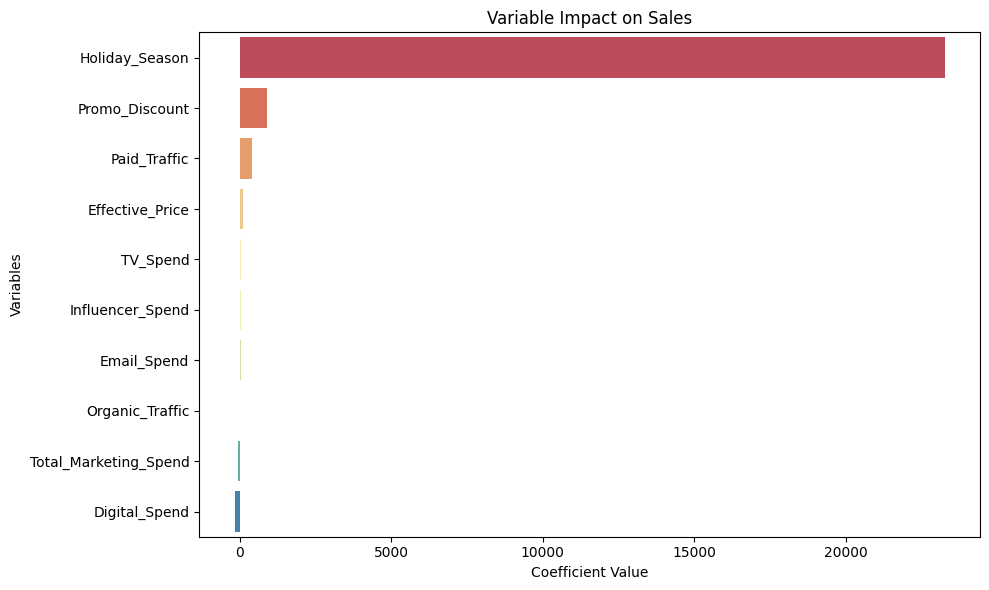

In [81]:
# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Variable', data=coeff_df, palette='Spectral')
plt.title("Variable Impact on Sales")
plt.xlabel("Coefficient Value")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()

From this, it is evident that Holiday season variable had a huge impact on the target variable when compared to other variables.

# Multicollinearilty check

Using VIF (Variable inflation factor) to detect if the variables are too correlated

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [83]:
X = add_constant(data[variables])
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [84]:
print(vif_data)

                 Variable           VIF
0                   const  1.508047e+03
1                TV_Spend           inf
2           Digital_Spend           inf
3             Email_Spend           inf
4        Influencer_Spend           inf
5         Organic_Traffic  9.610088e+00
6            Paid_Traffic  1.443068e+08
7         Effective_Price  1.295226e+00
8          Promo_Discount  1.260164e+00
9          Holiday_Season  1.840856e+00
10  Total_Marketing_Spend           inf


🧠  Wooaahh, the vif data has uncovered some serious multicollinearity issues
* All marketing channels, Total marketing spend (completely redundant) have infinite vif.
* Even the Paid Traffic have a high vif, as it might be the result of the marketing spends.

Let us drop a couple of highly correlated variables and recalculate VIF

In [85]:
data = data.drop(columns=['Total_Marketing_Spend','Paid_Traffic'])

In [86]:
variables_new = [
    "TV_Spend", "Digital_Spend", "Email_Spend", "Influencer_Spend",
    "Organic_Traffic", "Effective_Price", "Promo_Discount",
    "Holiday_Season"
]

In [87]:
X = add_constant(data[variables_new])   # updated variable list
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

            Feature          VIF
0             const  1360.106466
1          TV_Spend     1.243647
2     Digital_Spend     7.731218
3       Email_Spend     1.442047
4  Influencer_Spend     7.425745
5   Organic_Traffic     6.939637
6   Effective_Price     1.284184
7    Promo_Discount     1.239670
8    Holiday_Season     1.641121


Now the VIF values look fine, the Influencer_Spend and Digital_Spend are close to threshold(~10) but no need to worry about them

# Recommendations from the model

1. **Holiday season** has the strongest positive impact on sales
  *  We can allocate more budget towards October and Dec-Jan seasons.
2. **Promo Discount** has strong positive impact on sales
  *  But as discounts reduce margins, we can use targeted discounting.
  *  Testing smaller % discounts across different product categories using A/B tests would increase our sales without major margin cuts.
3. **TV and Influencer Spend** show consistency
  *  Focussing on marketing high level brands with niche influencers can help us efficiently.
4. **Email Spends** having positive impact with less VIF
  *  It is advisable to invest in personalised email campaigns.